In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
boston_housing = tf.keras.datasets.boston_housing

(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [2]:
train_x.shape,train_y.shape

((404, 13), (404,))

In [3]:
test_x.shape,test_y.shape

((102, 13), (102,))

In [4]:
x_train=train_x[:,5]
y_train=train_y

In [6]:
x_train.shape,y_train.shape

((404,), (404,))

In [7]:
x_test=test_x[:,5]
y_test=test_y

In [8]:
x_test.shape,y_test.shape

((102,), (102,))

In [9]:
learn_rate = 0.04
iter=2000
display_step=200

In [10]:
np.random.seed(612)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [13]:
w.numpy().dtype,b.numpy().dtype

(dtype('float32'), dtype('float32'))

In [11]:
mse_train=[]
mse_test=[]

for i in range(0, iter+1):
    with tf.GradientTape() as tape:
        pred_train = w*x_train+b
        loss_train = 0.5*tf.reduce_mean(tf.square(y_train-pred_train))
        
        pred_test = w*x_test+b
        loss_test = 0.5*tf.reduce_mean(tf.square(y_test-pred_test))
        
    mse_train.append(loss_train)
    mse_test.append(loss_test)
    
    dL_dw,dL_db = tape.gradient(loss_train, [w, b])
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
    if i % display_step == 0:
        print("i: %i, Train Loss: %f, Test Loss: %f" % (i, loss_train, loss_test))

i: 0, Train Loss: 321.837585, Test Loss: 337.568665
i: 200, Train Loss: 28.122614, Test Loss: 26.237764
i: 400, Train Loss: 27.144741, Test Loss: 25.099329
i: 600, Train Loss: 26.341951, Test Loss: 24.141077
i: 800, Train Loss: 25.682898, Test Loss: 23.332981
i: 1000, Train Loss: 25.141848, Test Loss: 22.650158
i: 1200, Train Loss: 24.697674, Test Loss: 22.072004
i: 1400, Train Loss: 24.333027, Test Loss: 21.581432
i: 1600, Train Loss: 24.033665, Test Loss: 21.164263
i: 1800, Train Loss: 23.787907, Test Loss: 20.808695
i: 2000, Train Loss: 23.586145, Test Loss: 20.504940


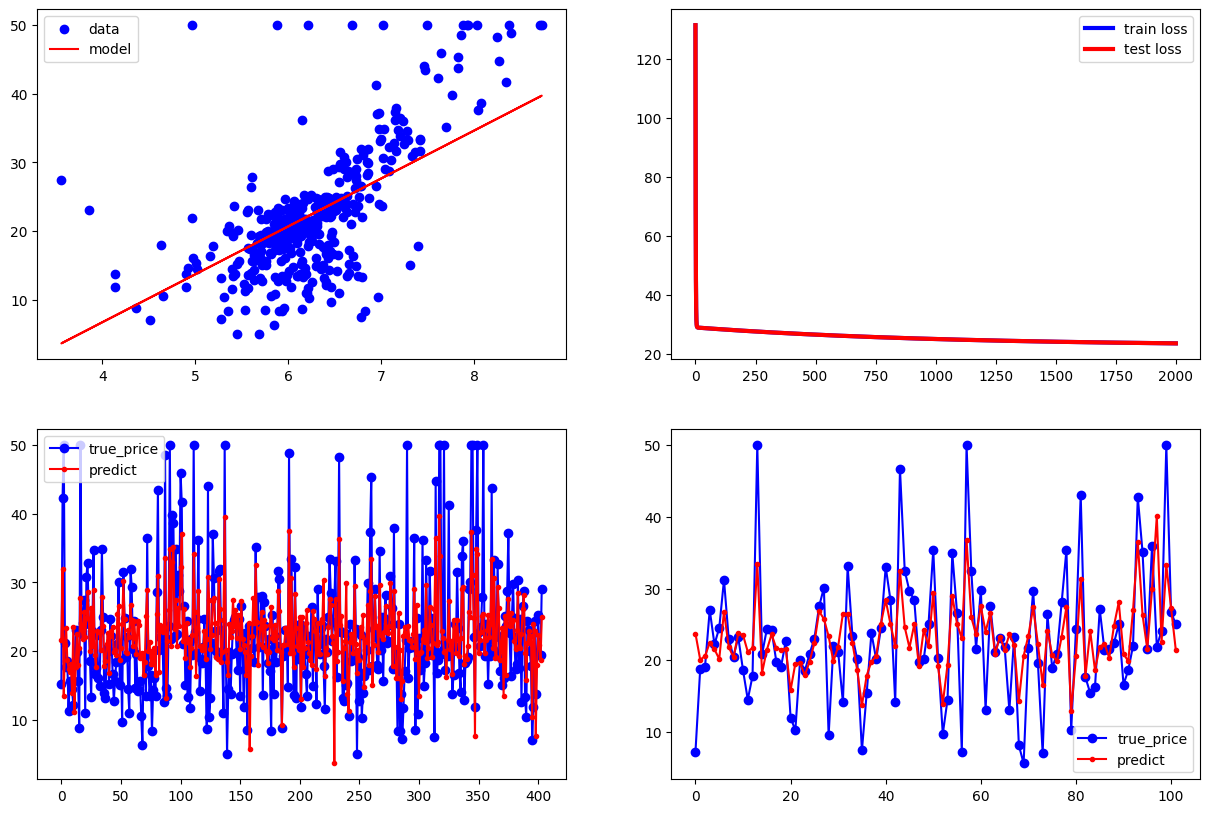

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x_train,y_train,color="blue",label="data")
plt.plot(x_train,pred_train,color="red",label="model")
plt.legend(loc="upper left")

plt.subplot(222)
plt.plot(mse_train,color="blue",linewidth=3,label="train loss")
plt.plot(mse_train,color="red",linewidth=3,label="test loss")
plt.legend(loc="upper right")

plt.subplot(223)
plt.plot(y_train,color="blue",marker="o",label="true_price")
plt.plot(pred_train,color="red",marker=".",label="predict")
plt.legend()

plt.subplot(224)
plt.plot(y_test,color="blue",marker="o",label="true_price")
plt.plot(pred_test,color="red",marker=".",label="predict")
plt.legend()

plt.show()